In [1]:
import numpy as np
import matplotlib.pyplot as plt

### $$\frac{d^2u}{d \theta ^2}=1-u+ \frac{3G^2M^2}{L^2}u^2$$

In [2]:
def f(t,u,G,M,L):
    return 3*G**2*M**2/L**2*u**2-u+1

In [34]:
'''
N = 5*8000
G = 1.0
M = 0.2
L = 1.0
E = 10.0

u0 = 0.5
uh0 = 0.0
theta0 = 0
dtheta = 0.0008


N = 5*8000
G = 6.67e-11
M = 1.99e+10
L = 2.71e+15
E = 2.71e+16

u0 = 0.5
uh0 = 0.0
theta0 = 0
dtheta = 0.0008
'''

N = 5*8000
G = 6.67e-11
M = 1.99e+25
L = 2.71e+20
E = 2.71e+16

u0 = 0.5
uh0 = 0.0
theta0 = 0
dtheta = 0.0008

In [35]:
theta = theta0
u = u0
uh = uh0
r = L**2/(G*M*u)
x = r*np.cos(theta)
y = r*np.sin(theta)
t = 0

In [36]:
X = []
Y = []
T = []

### $$u=\frac{L^2}{GMr}$$
### $$d\tau = \frac{r^2}{L} d\theta$$
### $$dt = \frac{E}{1-\frac{2GM}{r}} d\tau$$

In [37]:
for i in range(1,N):
    u_o = u
    uh_o = uh
    h = dtheta


    uh_hat = uh_o + h*f(theta,u_o,G,M,L)
    u = u_o + 0.5*h*(uh_o + uh_hat)

    u_hat = u_o + h*uh_o
    uh = uh_o + 0.5*h*(f(theta, u_o, G, M, L) + f(theta, u_hat, G, M, L))

    r = L**2/(G*M*u)

    d_tau = r**2 * dtheta / L
    dt = E * d_tau / (1.0 - 2 * G * M / r)
    t = t + dt

    theta = theta + dtheta
    x = r*np.cos(theta)
    y = r*np.sin(theta)

    X.append(x)
    Y.append(y)
    T.append(t)

    #theta = theta + dtheta

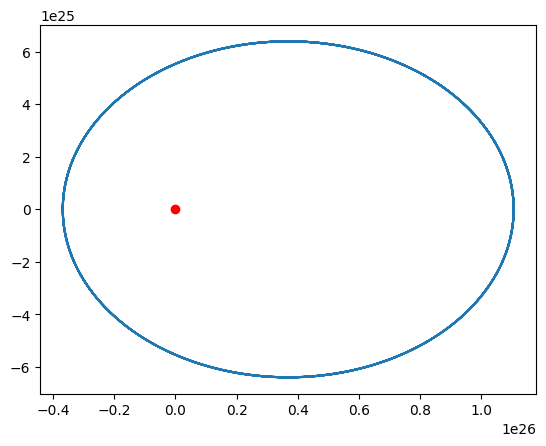

In [38]:
plt.scatter(0,0, c='r')
plt.plot(X,Y)